# Workgroup 2 
- Luis
- Álvaro
- Diego

## 1. In a markdown cell of the Visual Code, explain the idea of sample splitting to evaluate the performance of prediction as presented in class. Use equations in your explanation.

When we try to ger the better prediction model, we can split the sample. By doing this, we will have two datasets randomly splitted: a training sample and a testing sample. Usually the 75% of the sample is used for training and the reimaing data is used for testing.

We take the original model as: 
$$ Y = \beta_1 X_1 + \beta_2 X_2 $$ 
An a functional model of the regression as:
$$f(X) = \beta_1 X_1 + \beta_2 X_2 $$
 
We split it as:
$$ Y = [ Y^{train} \   Y^{test}] $$ 
$$ X_1 = [X_1^{train} \   X_1^{test}] $$
$$ X_2 = [X_2^{train} \   X_2^{test}] $$ 

In order to estimate the prediction rule, we proceed to regress:  $ Y^{train} $ ~ $ X_1^{train},  X_2^{train}$ to obtain the estimated the parameters of prediction.
$$ \hat{f}(X^{train}) = \hat\beta_1 X_1^{train} + \hat\beta_2 X_2^{train} = \hat{Y}^{train}$$

Next, we will use the testing dataset to compare the predicted outcome, $\hat{Y}^{test}$ as follows:
$$ \hat{Y}^{test} = \hat\beta_1 X_1^{test} + \hat\beta_2 X_2^{test} $$

Finally, to check the power of our prediction model, we need to obtain the Mean Squared Error from testing. As lower the MSE is, the better.
$$MSE_{test} = \frac{1}{n} \sum [Y^{test} - \hat{Y}^{test}]^2 $$


## 2. Explain what cross-validation is. Use figures, Equations, code and your intuition to explain this concept and how we used it when choosing the optimal lambda from a lasso regression.

The cross-validation method is used to compare the outcomes from different candidates to a value of interest using different portions of the data. In this case, we use the method to obtain the optimal lambda ($\lambda$) that gets the better estimated parameters of an OLS regression.

First, we present a grid of potential $\lambda$ candidates choosen arbitrarily, we will use 5:
$$ \lambda \in [ 0.1; 0.2; 0.25; 0.5 ;0.9 ] $$

Then, we continue splitting the dataset in an arbitrary number of folds, each one has the same number of elements. We will split our dataset in 10 folds, containing 10 elements each fold.

$$ K = [ \begin{matrix} 
K_1&K_2&K_3&K_4&K_5&...&K_{10}]
\end{matrix} $$

The main porpouse of this method is to evaluate every lambda and choose the one that better fits our condition. We want the $\lambda$ that minimizes the MSE for our Lasso-OLS regression, this assure us the best predictive model aviable using the least number of parameters, obtaining a parsimonious model. First, we evaluate $\lambda_1= 0.1$, using every folds to fit the model except $K_j$. In this first step, $j=1$, so we will use $K_{2-10}$ (90 elements). 
$$ \min_{b \in R^p} (Y_i - b'X_i)^2 + \lambda_1 \sum_{w=1}^{p} b_w $$

Then, we obtain the estimated $b$ that will be tested using the $K_1$ fold.
$$\hat{b}{K{2-10}} X_{K_1} = \hat{Y}_{K_1}$$ 

Then, we repeat the same process for $K_2$ to $K_{10}$. Finally, collect all $\hat{Y}{K{1-10}}$ to calculate the MSE of the model using $\lambda_1 = 0.1$ (remember that n = number of total observations):

$$MSE_{\lambda =0.1} = \frac{1}{n} \sum [Y - \hat{Y}{K{1-10}}]^2$$

Repeat the same process for each $\lambda$, and then compare every $MSE$ value. The $\lambda$ that returns the lower Mean Square Error, is the optimal lambda that let us get the best predictive model for our dataset.

In [1]:
#using Pkg
#Pkg.add("GLM")
#Pkg.add("Plots")
#Pkg.add("DataFrames")
#Pkg.add("RData")
#Pkg.add("CategoricalArrays")
#Pkg.add("CSV")
#Pkg.add("Tables")
#Pkg.add("Lathe")
#Pkg.add("StatsPlots")
#Pkg.add("Lasso")
#Pkg.add("CovarianceMatrices")
#Pkg.add("MLBase")
#Pkg.add("StatsModels")
#Pkg.add("Combinatorics")

In [2]:
using DataFrames
using Dates
using Plots
using Statistics,RData  #upload data of R format 
using CategoricalArrays # categorical data
using DataFrames
using CSV
using Tables
using Lathe
using GLM
using Lasso
using StatsPlots
using CovarianceMatrices
using MLBase
using StatsModels
using Combinatorics

# Question 3

In [3]:
rdata_read = load("../../data/wage2015_subsample_inference.RData")
data = rdata_read["data"]
names(data)
println("Number of Rows : ", size(data)[1],"\n","Number of Columns : ", size(data)[2],) #rows and columns

Number of Rows : 5150
Number of Columns : 20


In [4]:
describe(data)

20×7 DataFrame
 Row │ variable  mean      min      median   max      nmissing  eltype         ⋯
     │ Symbol    Union…    Any      Union…   Any      Int64     DataType       ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ wage      23.4104   3.02198  19.2308  528.846         0  Float64        ⋯
   2 │ lwage     2.97079   1.10591  2.95651  6.2707          0  Float64
   3 │ sex       0.444466  0.0      0.0      1.0             0  Float64
   4 │ shs       0.023301  0.0      0.0      1.0             0  Float64
   5 │ hsg       0.243883  0.0      0.0      1.0             0  Float64        ⋯
   6 │ scl       0.278058  0.0      0.0      1.0             0  Float64
   7 │ clg       0.31767   0.0      0.0      1.0             0  Float64
   8 │ ad        0.137087  0.0      0.0      1.0             0  Float64
   9 │ mw        0.259612  0.0      0.0      1.0             0  Float64        ⋯
  10 │ so        0.296505  0.0      0.0      1.0             0  Float64
  11 │ we        0.216117  0.0      0.0      1.0             0  Float64
  12 │ ne        0.227767  0.0      0.0      1.0             0  Float64
  13 │ exp1      13.7606   0.0      10.0     47.0            0  Float64        ⋯
  14 │ exp2      3.01893   0.0      1.0      22.09           0  Float64
  15 │ exp3      8.23587   0.0      1.0      103.823         0  Float64
  16 │ exp4      25.118    0.0      1.0      487.968         0  Float64
  17 │ occ                 10                1e+05           0  CategoricalVal ⋯
  18 │ occ2                1                 22              0  CategoricalVal
  19 │ ind                 370               1e+05           0  CategoricalVal
  20 │ ind2                2                 22              0  CategoricalVal
                                                                1 column omitted

In [5]:
#Descriptive data table of variables by sex
Z = select(data, ["lwage","sex","shs","hsg","scl","clg","ad","ne","mw","so","we","exp1"])

data_female = filter(row -> row.sex == 1, data)
Z_female = select(data_female,["lwage","sex","shs","hsg","scl","clg","ad","ne","mw","so","we","exp1"] )

data_male = filter(row -> row.sex == 0, data)
Z_male = select(data_male,["lwage","sex","shs","hsg","scl","clg","ad","ne","mw","so","we","exp1"] )

means = DataFrame( variables = names(Z), All = describe(Z, :mean)[!,2], Men = describe(Z_male,:mean)[!,2], Female = describe(Z_female,:mean)[!,2])

12×4 DataFrame
 Row │ variables  All        Men         Female     
     │ String     Float64    Float64     Float64    
─────┼──────────────────────────────────────────────
   1 │ lwage       2.97079    2.98783     2.94948
   2 │ sex         0.444466   0.0         1.0
   3 │ shs         0.023301   0.0318071   0.0126693
   4 │ hsg         0.243883   0.294303    0.180865
   5 │ scl         0.278058   0.273331    0.283967
   6 │ clg         0.31767    0.293953    0.347313
   7 │ ad          0.137087   0.106606    0.175186
   8 │ ne          0.227767   0.22195     0.235037
   9 │ mw          0.259612   0.259       0.260376
  10 │ so          0.296505   0.298148    0.294452
  11 │ we          0.216117   0.220902    0.210135
  12 │ exp1       13.7606    13.784      13.7313

Filtrado de la data

In [6]:
#Some college and complete college
data_comp = filter(row ->(row.shs == 1 || row.hsg == 1), data)

1376×20 DataFrame
  Row │ wage      lwage    sex      shs      hsg      scl      clg      ad     ⋯
      │ Float64   Float64  Float64  Float64  Float64  Float64  Float64  Float6 ⋯
──────┼─────────────────────────────────────────────────────────────────────────
    1 │ 11.0577   2.40313      0.0      0.0      1.0      0.0      0.0      0. ⋯
    2 │ 19.2308   2.95651      1.0      0.0      1.0      0.0      0.0      0.
    3 │ 19.2308   2.95651      0.0      0.0      1.0      0.0      0.0      0.
    4 │ 12.0      2.48491      1.0      0.0      1.0      0.0      0.0      0.
    5 │ 17.3077   2.85115      1.0      0.0      1.0      0.0      0.0      0. ⋯
    6 │ 12.0192   2.48651      0.0      0.0      1.0      0.0      0.0      0.
    7 │ 27.8846   3.32808      0.0      0.0      1.0      0.0      0.0      0.
    8 │ 21.6      3.07269      0.0      0.0      1.0      0.0      0.0      0.
    9 │ 19.2308   2.95651      0.0      0.0      1.0      0.0      0.0      0. ⋯
   10 │ 13.1868   2.57922      0.0      0.0      1.0      0.0      0.0      0.
   11 │ 19.2308   2.95651      0.0      0.0      1.0      0.0      0.0      0.
  ⋮   │    ⋮         ⋮        ⋮        ⋮        ⋮        ⋮        ⋮        ⋮   ⋱
 1367 │  8.65385  2.158        1.0      0.0      1.0      0.0      0.0      0.
 1368 │ 12.0192   2.48651      0.0      0.0      1.0      0.0      0.0      0. ⋯
 1369 │ 12.5      2.52573      1.0      0.0      1.0      0.0      0.0      0.
 1370 │  9.61538  2.26336      0.0      0.0      1.0      0.0      0.0      0.
 1371 │ 12.0192   2.48651      0.0      0.0      1.0      0.0      0.0      0.
 1372 │ 12.9808   2.56347      0.0      0.0      1.0      0.0      0.0      0. ⋯
 1373 │ 13.4615   2.59984      1.0      0.0      1.0      0.0      0.0      0.
 1374 │ 22.5962   3.11778      0.0      0.0      1.0      0.0      0.0      0.
 1375 │ 16.8269   2.82298      0.0      0.0      1.0      0.0      0.0      0.
 1376 │ 32.967    3.49551      0.0      0.0      1.0      0.0      0.0      0. ⋯
                                                13 columns and 1355 rows omitted

In [7]:
#Focus on the subset of high school workers (shs, hsg variables). 
#Descriptive data table of variables by College education
C = select(data, ["lwage","sex","shs","hsg","scl","clg","ad","ne","mw","so","we","exp1"])

data_some_high = filter(row -> row.shs == 1, data)
C_some_high = select(data_some_high,["lwage","sex","shs","hsg","scl","clg","ad","ne","mw","so","we","exp1"] )

data_high = filter(row -> row.hsg == 1, data)
C_high = select(data_high,["lwage","sex","shs","hsg","scl","clg","ad","ne","mw","so","we","exp1"] )

means = DataFrame( variables = names(C), All = describe(C, :mean)[!,2], Some_high_school = describe(C_some_high,:mean)[!,2],High_School_Grad = describe(C_high,:mean)[!,2])


12×4 DataFrame
 Row │ variables  All        Some_high_school  High_School_Grad 
     │ String     Float64    Float64           Float64          
─────┼──────────────────────────────────────────────────────────
   1 │ lwage       2.97079           2.62983           2.72704
   2 │ sex         0.444466          0.241667          0.329618
   3 │ shs         0.023301          1.0               0.0
   4 │ hsg         0.243883          0.0               1.0
   5 │ scl         0.278058          0.0               0.0
   6 │ clg         0.31767           0.0               0.0
   7 │ ad          0.137087          0.0               0.0
   8 │ ne          0.227767          0.15              0.230892
   9 │ mw          0.259612          0.266667          0.288217
  10 │ so          0.296505          0.341667          0.286624
  11 │ we          0.216117          0.241667          0.194268
  12 │ exp1       13.7606           18.1875           17.0947

### Plots

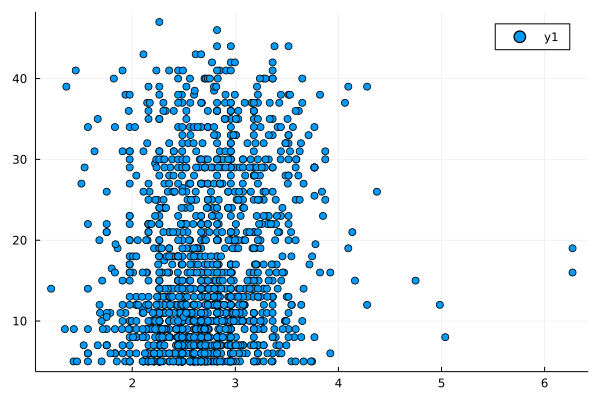

In [8]:
scatter(data_comp.lwage,data_comp.exp1)

In [9]:
K = select(data_comp, ["lwage","sex","shs","hsg","ne","mw","so","we","exp1"])

data_female = filter(row -> row.sex == 1, data_comp)
K_female = select(data_female,["lwage","sex","shs","hsg","ne","mw","so","we","exp1"] )

data_male = filter(row -> row.sex == 0, data_comp)
K_male = select(data_male,["lwage","sex","shs","hsg","ne","mw","so","we","exp1"] );

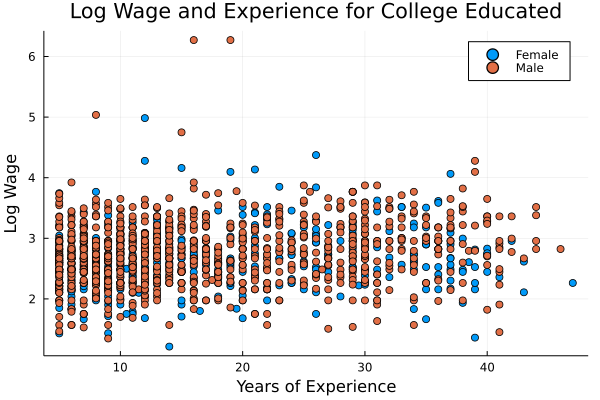

In [10]:
SCplot = scatter(K_female.exp1,K_female.lwage, title = "Log Wage and Experience for College Educated",
    xlabel = "Years of Experience", ylabel = "Log Wage", label="Female",legend = true)
scatter!(K_male.exp1,K_male.lwage, label = "Male")

In [46]:
data_shs = filter(row -> row.shs == 1, data_comp)
K_shs = select(data_shs,["lwage","sex","shs","hsg","scl","clg","ad","ne","mw","so","we","exp1"] )

data_hsg = filter(row -> row.hsg == 1, data_comp)
K_hsg = select(data_hsg,["lwage","sex","shs","hsg","scl","clg","ad","ne","mw","so","we","exp1"] )
;

In [47]:
data_ne = filter(row -> row.ne == 1, data_comp)
K_ne = select(data_ne,["lwage","sex","shs","hsg","scl","clg","ad","ne","mw","so","we","exp1"] )

data_mw = filter(row -> row.mw == 1, data_comp)
K_mw = select(data_mw,["lwage","sex","shs","hsg","scl","clg","ad","ne","mw","so","we","exp1"] )

data_so = filter(row -> row.so == 1, data_comp)
K_so = select(data_so,["lwage","sex","shs","hsg","scl","clg","ad","ne","mw","so","we","exp1"] )

data_we = filter(row -> row.we == 1, data_comp)
K_we = select(data_we,["lwage","sex","shs","hsg","scl","clg","ad","ne","mw","so","we","exp1"] );

df = DataFrame(data_comp);

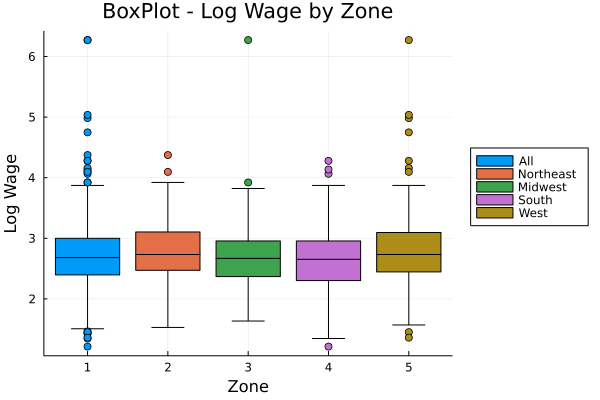

In [48]:
Bplot1 = boxplot(df.lwage, title = "BoxPlot - Log Wage by Zone",
    ylabel = "Log Wage", xlabel = "Zone",label = "All", legend =:outerright )
boxplot!(K_ne.lwage, label = "Northeast" )
boxplot!(K_mw.lwage, label = "Midwest" )
boxplot!(K_so.lwage, label = "South" )
boxplot!(K_we.lwage, label = "West")

In [49]:
data_shs = filter(row -> row.shs == 1, data_comp)
K_shs = select(data_shs,["lwage","sex","shs","hsg","scl","clg","ad","ne","mw","so","we","exp1"] )

data_hsg = filter(row -> row.hsg == 1, data_comp)
K_hsg = select(data_hsg,["lwage","sex","shs","hsg","scl","clg","ad","ne","mw","so","we","exp1"] )
;

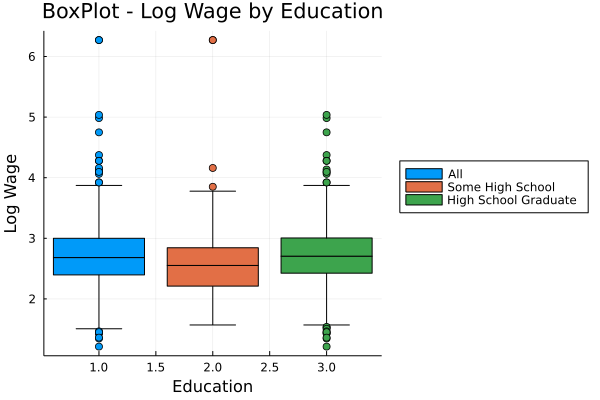

In [50]:
Bplot = boxplot(df.lwage, title = "BoxPlot - Log Wage by Education",
    ylabel = "Log Wage", xlabel = "Education",label = "All", legend =:outerright )
boxplot!(K_shs.lwage, label = "Some High School" )
boxplot!(K_hsg.lwage, label = "High School Graduate")

### Basic Model: OLS

In [16]:
#basic model
basic  = @formula(lwage ~ (sex + exp1 + shs + hsg + mw + so + we + occ2 + ind2))
basic_results  = lm(basic, data_comp)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}}}}, Matrix{Float64}}

lwage ~ 1 + sex + exp1 + shs + hsg + mw + so + we + occ2 + ind2

Coefficients:
────────────────────────────────────────────────────────────────────────────────────
                   Coef.    Std. Error       t  Pr(>|t|)     Lower 95%     Upper 95%
────────────────────────────────────────────────────────────────────────────────────
(Intercept)   0.0         NaN           NaN       NaN     NaN           NaN
sex          -0.0733094     0.0314431    -2.33    0.0199   -0.134993     -0.0116259
exp1          0.00757417    0.00125148    6.05    <1e-08    0.00511908    0.0100293
shs           2.75187       0.144638     19.03    <1e-70    2.46813       3.03562
hsg           2.83301       0.139279     20.34    <1e-79    2.55978       3.10624
mw           -0.0431882     0.0362014    -1.19    0.2331   -0.114206      0.0278

In [17]:
#r2 y r2 adjusted
print("R2: ",r2(basic_results),",","\n")
print("R2 adjusted: ",adjr2(basic_results))

R2: 0.18023814876721,
R2 adjusted: 0.15122549288773635

In [18]:
#Suma de residuos al cuadrado
basic_results_e = sum(residuals(basic_results).^2)
print("MSE: ",basic_results_e)

MSE: 286.5094592738604

### Flexible Model: OLS

In [19]:
# couples variables combinations
combinations_upto(x, n) = Iterators.flatten(combinations(x, i) for i in 1:n)
# combinations without same couple
expand_exp(args, deg::ConstantTerm) =
    tuple(((&)(terms...) for terms in combinations_upto(args, deg.n))...)

StatsModels.apply_schema(t::FunctionTerm{typeof(^)}, sch::StatsModels.Schema, ctx::Type) =
    apply_schema.(expand_exp(t.args_parsed...), Ref(sch), ctx)

In [20]:
#flexible model
flex = @formula(lwage ~ sex + (exp1+exp2+exp3+exp4+shs+hsg+occ2+ind2+mw+so+we)^2)
flex = apply_schema(flex, schema(flex, data_comp))
regflex = lm(flex, data_comp)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}}}}, Matrix{Float64}}

lwage ~ 1 + sex + exp1 + exp2 + exp3 + exp4 + shs + hsg + occ2 + ind2 + mw + so + we + exp1 & exp2 + exp1 & exp3 + exp1 & exp4 + exp1 & shs + exp1 & hsg + exp1 & occ2 + exp1 & ind2 + exp1 & mw + exp1 & so + exp1 & we + exp2 & exp3 + exp2 & exp4 + exp2 & shs + exp2 & hsg + exp2 & occ2 + exp2 & ind2 + exp2 & mw + exp2 & so + exp2 & we + exp3 & exp4 + exp3 & shs + exp3 & hsg + exp3 & occ2 + exp3 & ind2 + exp3 & mw + exp3 & so + exp3 & we + exp4 & shs + exp4 & hsg + exp4 & occ2 + exp4 & ind2 + exp4 & mw + exp4 & so + exp4 & we + shs & hsg + shs & occ2 + shs & ind2 + shs & mw + shs & so + shs & we + hsg & occ2 + hsg & ind2 + hsg & mw + hsg & so + hsg & we + occ2 & ind2 + occ2 & mw + occ2 & so + occ2 & we + ind2 & mw + ind2 & so + ind2 & we + mw & so + mw & we + so & we

Coefficients:
────────────────────────────────

In [21]:
#r2 y r2 adjusted
print("R2: ",r2(regflex),",","\n")
print("R2 adjusted: ",adjr2(regflex))

R2: 0.5017414107227818,
R2 adjusted: 0.22935257563984812

In [22]:
#Suma de residuos al cuadrado
regflex_e = sum(residuals(regflex).^2)
print("MSE: ",regflex_e)

MSE: 174.1430133369716

### Table

In [ ]:
table = NamedArray(zeros(2, 5))

table[1,2] = GLM.coeftable(basic_results).cols[1][2]
table[1,3] = GLM.coeftable(basic_results).cols[2][2]
table[1,4] = GLM.coeftable(basic_results).cols[5][2]
table[1,5] = GLM.coeftable(basic_results).cols[6][2]

table[2,2] = GLM.coeftable(regflex).cols[1][2]
table[2,3] = GLM.coeftable(regflex).cols[2][2]
table[2,4] = GLM.coeftable(regflex).cols[5][2]
table[2,5] = GLM.coeftable(flex_results).cols[6][2]

T = DataFrame(table, [ :"Model", :"Estimate", :"standar error", :"Lower bound", :"Upper bound"])  # table to dataframe 
T[!,:Model] = string.(T[!,:Model])  # string - first column 

T[1,1] = "OLS"
T[2,1] = "OLS Flexible"


header = (["Model", "Estimate", "standar error", "Lower bound", "Upper bound"])

pretty_table(T; backend = Val(:html), header = header, formatters=ft_round(4), alignment=:c)

In [ ]:
# Coef. Plot

xerror = T[!,2] .- T[!,4]

scatter( T[!,2], T[!,1], label = "", xerrors = xerror, 
        xtick = -1:0.01:1, linestyle = :dash, seriescolor=:red)

plot!(size=(750,400), title="Linear Model - CI")

## Replication: LASSO

In [24]:
#Basic model using Lasso
basic_model_lasso=fit(LassoModel,basic,data_comp)

StatsModels.TableRegressionModel{LassoModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}}}}, MinAICc}, Matrix{Float64}}

lwage ~ sex + exp1 + shs + hsg + mw + so + we + occ2 + ind2

Coefficients:
LassoModel using MinAICc(2) segment of the regularization path.

Coefficients:
────────────────
        Estimate
────────────────
x1    2.78757
x2   -0.0636808
x3    0.00732667
x4   -0.0727644
x5    0.0001641
x6   -0.0420623
x7   -0.103461
x8    0.0131922
x9   -0.0427606
x10   0.089629
x11   0.0786581
x12   0.293881
x13  -0.182363
x14  -0.0111948
x15  -0.510813
x16  -0.152858
x17   0.0458913
x18  -0.268931
x19  -0.306809
x20  -0.329228
x21  -0.424509
x22  -0.344561
x23  -0.0974689
x24  -0.219692
x25  -0.218611
x26  -0.012981
x27   0.0
x28  -0.0585938
x29  -0.211742
x30   0.100921
x31   0.0
x32   0.0
x33  -0.025103
x34   0.134644
x35   0.0
x36   0.0
x37   0.13772
x38   0.349806
x39   0.172256
x40   0.140481
x41   0.10

In [25]:
basic_model_lasso_e = sum(residuals(basic_model_lasso).^2)
basic_model_lasso_p = sum(predict(basic_model_lasso).^2)
basic_model_lasso_r2 =basic_model_lasso_p /(basic_model_lasso_e + basic_model_lasso_p)

print("BASIC MODEL","\n")
print("R2: ",basic_model_lasso_r2,",","\n")
print("MSE: ",basic_model_lasso_e)

BASIC MODEL
R2: 0.9725712548455131,
MSE: 288.2801967697941

In [26]:
#Flexible model using Lasso
flex_model = @formula(lwage ~ sex + (exp1+exp2+exp3+exp4+shs+hsg+occ2+ind2+mw+so+we)^2)
flex_model = apply_schema(flex_model, schema(flex_model, data_comp))
flexible_model_lasso=fit(LassoModel,flex_model,data_comp,standardize=false)

StatsModels.TableRegressionModel{LassoModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}}}}, MinAICc}, Matrix{Float64}}

lwage ~ sex + exp1 + exp2 + exp3 + exp4 + shs + hsg + occ2 + ind2 + mw + so + we + exp1 & exp2 + exp1 & exp3 + exp1 & exp4 + exp1 & shs + exp1 & hsg + exp1 & occ2 + exp1 & ind2 + exp1 & mw + exp1 & so + exp1 & we + exp2 & exp3 + exp2 & exp4 + exp2 & shs + exp2 & hsg + exp2 & occ2 + exp2 & ind2 + exp2 & mw + exp2 & so + exp2 & we + exp3 & exp4 + exp3 & shs + exp3 & hsg + exp3 & occ2 + exp3 & ind2 + exp3 & mw + exp3 & so + exp3 & we + exp4 & shs + exp4 & hsg + exp4 & occ2 + exp4 & ind2 + exp4 & mw + exp4 & so + exp4 & we + shs & hsg + shs & occ2 + shs & ind2 + shs & mw + shs & so + shs & we + hsg & occ2 + hsg & ind2 + hsg & mw + hsg & so + hsg & we + occ2 & ind2 + occ2 & mw + occ2 & so + occ2 & we + ind2 & mw + ind2 & so + ind2 & we + mw & so + mw & we + so & we

Coefficients:
LassoModel usin

In [27]:
flexible_model_lasso_e = sum(residuals(flexible_model_lasso).^2)
flexible_model_lasso_p = sum(predict(flexible_model_lasso).^2)
flexible_model_lasso_r2 =flexible_model_lasso_p /(flexible_model_lasso_e + flexible_model_lasso_p)

print("FLEXIBLE MODEL","\n")
print("R2: ",flexible_model_lasso_r2,",","\n")
print("MSE: ",flexible_model_lasso_e)

FLEXIBLE MODEL
R2: 0.9733177138146415,
MSE: 280.3711423405082

### Data splititng

In [28]:
using Random
Random.seed!(3);

In [29]:
data_comp_random = data_comp[shuffle(1:nrow(data_comp)),:];
a = floor(nrow(data_comp_random)*4/5)
print("# observations train sample: ",a)
print("\n# observations test sample: ",276)
train = data_comp_random[1:1100,:]
test = data_comp_random[1101:end,:]

# observations train sample: 1100.0
# observations test sample: 276

276×20 DataFrame
 Row │ wage       lwage    sex      shs      hsg      scl      clg      ad     ⋯
     │ Float64    Float64  Float64  Float64  Float64  Float64  Float64  Float6 ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │  14.4231   2.66883      1.0      0.0      1.0      0.0      0.0      0. ⋯
   2 │  10.5769   2.35867      1.0      0.0      1.0      0.0      0.0      0.
   3 │  12.0192   2.48651      0.0      0.0      1.0      0.0      0.0      0.
   4 │  24.0385   3.17966      1.0      0.0      1.0      0.0      0.0      0.
   5 │   5.76923  1.75254      0.0      0.0      1.0      0.0      0.0      0. ⋯
   6 │  11.2981   2.42463      0.0      0.0      1.0      0.0      0.0      0.
   7 │   9.13462  2.21207      0.0      0.0      1.0      0.0      0.0      0.
   8 │  24.0385   3.17966      0.0      0.0      1.0      0.0      0.0      0.
   9 │  12.0192   2.48651      1.0      0.0      1.0      0.0      0.0      0. ⋯
  10 │   9.61538  2.26336      0.0      0.0      1.0      0.0      0.0      0.
  11 │  19.4231   2.96646      0.0      0.0      1.0      0.0      0.0      0.
  ⋮  │     ⋮         ⋮        ⋮        ⋮        ⋮        ⋮        ⋮        ⋮   ⋱
 267 │  16.8269   2.82298      0.0      0.0      1.0      0.0      0.0      0.
 268 │  15.0094   2.70868      1.0      0.0      1.0      0.0      0.0      0. ⋯
 269 │  20.0      2.99573      1.0      0.0      1.0      0.0      0.0      0.
 270 │   6.69231  1.90096      1.0      0.0      1.0      0.0      0.0      0.
 271 │  11.9543   2.48109      1.0      0.0      1.0      0.0      0.0      0.
 272 │  14.9038   2.70162      0.0      0.0      1.0      0.0      0.0      0. ⋯
 273 │ 528.846    6.2707       0.0      1.0      0.0      0.0      0.0      0.
 274 │  62.5      4.13517      1.0      0.0      1.0      0.0      0.0      0.
 275 │  14.2308   2.65541      0.0      0.0      1.0      0.0      0.0      0.
 276 │  12.0      2.48491      0.0      0.0      1.0      0.0      0.0      0. ⋯
                                                 13 columns and 255 rows omitted

#### Train Models

In [30]:
#Basic model using Lasso with train data
basic_model_lasso_train=fit(LassoModel,basic,train)

StatsModels.TableRegressionModel{LassoModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}}}}, MinAICc}, Matrix{Float64}}

lwage ~ sex + exp1 + shs + hsg + mw + so + we + occ2 + ind2

Coefficients:
LassoModel using MinAICc(2) segment of the regularization path.

Coefficients:
────────────────
        Estimate
────────────────
x1    2.94657
x2   -0.0575934
x3    0.00758945
x4   -0.11996
x5    0.0
x6   -0.0487017
x7   -0.108604
x8    0.0251948
x9   -0.222009
x10   0.0
x11   0.0726384
x12   0.222589
x13  -0.357122
x14  -0.187009
x15  -0.713194
x16  -0.208043
x17  -0.0959402
x18  -0.409469
x19  -0.424047
x20  -0.406194
x21  -0.543972
x22  -0.5237
x23  -0.278479
x24  -0.370412
x25  -0.490484
x26  -0.13817
x27  -0.134337
x28  -0.190671
x29  -0.352686
x30  -0.192195
x31   0.0
x32  -0.0868792
x33  -0.0702584
x34   0.126523
x35   0.0782213
x36   0.00242988
x37   0.141368
x38   0.254391
x39   0.198464
x40   0.109016
x41 

In [31]:
basic_model_lasso_train_e = sum(residuals(basic_model_lasso_train).^2)
basic_model_lasso_train_p = sum(predict(basic_model_lasso_train).^2)
basic_model_lasso_train_r2 =basic_model_lasso_train_p /(basic_model_lasso_train_e + basic_model_lasso_train_p)

print("BASIC MODEL","\n")
print("R2: ",basic_model_lasso_train_r2,",","\n")
print("MSE: ",basic_model_lasso_train_e)

BASIC MODEL
R2: 0.9744572810479564,
MSE: 214.8037613357161

In [32]:
#Flexible model using Lasso with train data
flex_model1 = @formula(lwage ~ sex + (exp1+exp2+exp3+exp4+shs+hsg+occ2+ind2+mw+so+we)^2)
flex_model1 = apply_schema(flex_model1, schema(flex_model1, train))
flexible_model_lasso_train=fit(LassoModel,flex_model1,train,standardize=false)

StatsModels.TableRegressionModel{LassoModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}}}}, MinAICc}, Matrix{Float64}}

lwage ~ sex + exp1 + exp2 + exp3 + exp4 + shs + hsg + occ2 + ind2 + mw + so + we + exp1 & exp2 + exp1 & exp3 + exp1 & exp4 + exp1 & shs + exp1 & hsg + exp1 & occ2 + exp1 & ind2 + exp1 & mw + exp1 & so + exp1 & we + exp2 & exp3 + exp2 & exp4 + exp2 & shs + exp2 & hsg + exp2 & occ2 + exp2 & ind2 + exp2 & mw + exp2 & so + exp2 & we + exp3 & exp4 + exp3 & shs + exp3 & hsg + exp3 & occ2 + exp3 & ind2 + exp3 & mw + exp3 & so + exp3 & we + exp4 & shs + exp4 & hsg + exp4 & occ2 + exp4 & ind2 + exp4 & mw + exp4 & so + exp4 & we + shs & hsg + shs & occ2 + shs & ind2 + shs & mw + shs & so + shs & we + hsg & occ2 + hsg & ind2 + hsg & mw + hsg & so + hsg & we + occ2 & ind2 + occ2 & mw + occ2 & so + occ2 & we + ind2 & mw + ind2 & so + ind2 & we + mw & so + mw & we + so & we

Coefficients:
LassoModel usin

In [33]:
flexible_model_lasso_train_e = sum(residuals(flexible_model_lasso_train).^2)
flexible_model_lasso_train_p = sum(predict(flexible_model_lasso_train).^2)
flexible_model_lasso_train_r2 =flexible_model_lasso_train_p /(flexible_model_lasso_train_e + flexible_model_lasso_train_p)

print("FLEXIBLE MODEL","\n")
print("R2: ",flexible_model_lasso_train_r2,",","\n")
print("MSE: ",flexible_model_lasso_train_e)

FLEXIBLE MODEL
R2: 0.9752491803566848,
MSE: 207.89287345324146

#### Test model

In [34]:
#Basic model using Lasso with test data
basic_model_lasso_test=fit(LassoModel,basic,test)

StatsModels.TableRegressionModel{LassoModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}}}}, MinAICc}, Matrix{Float64}}

lwage ~ sex + exp1 + shs + hsg + mw + so + we + occ2 + ind2

Coefficients:
LassoModel using MinAICc(2) segment of the regularization path.

Coefficients:
────────────────
        Estimate
────────────────
x1    2.66327
x2   -0.0603989
x3    0.00410784
x4    0.0
x5    0.0
x6    0.0
x7   -0.0197619
x8    0.0
x9    0.0
x10   0.0
x11   0.0
x12   0.0
x13   0.0
x14   0.0
x15   0.0
x16   0.0
x17   0.0
x18  -0.11916
x19  -0.0785138
x20   0.0
x21   0.0
x22   0.0
x23   0.0
x24   0.0
x25   0.123099
x26   0.0230016
x27   0.0
x28   0.161515
x29   0.0
x30   0.00667599
x31   0.0
x32   0.0
x33   0.0
x34   0.0
x35   0.0
x36   0.503953
x37   0.0
x38   0.0
x39   0.0
x40   0.0
x41   0.0
x42   0.0
x43   0.0
x44   0.0
x45  -0.0134877
x46   0.0
x47   0.0
────────────────


In [35]:
basic_model_lasso_test_e = sum(residuals(basic_model_lasso_test).^2)
basic_model_lasso_test_p = sum(predict(basic_model_lasso_test).^2)
basic_model_lasso_test_r2 =basic_model_lasso_test_p /(basic_model_lasso_test_e + basic_model_lasso_test_p)

print("BASIC MODEL","\n")
print("R2: ",basic_model_lasso_test_r2,",","\n")
print("MSE: ",basic_model_lasso_test_e)

BASIC MODEL
R2: 0.9651508744841044,
MSE: 73.26197400652546

In [36]:
#Flexible model using Lasso with test data
flex_model2 = @formula(lwage ~ sex + (exp1+exp2+exp3+exp4+shs+hsg+occ2+ind2+mw+so+we)^2)
flex_model2 = apply_schema(flex_model2, schema(flex_model2, test))
flexible_model_lasso_test=fit(LassoModel,flex_model2,test,standardize=false)

StatsModels.TableRegressionModel{LassoModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}}}}, MinAICc}, Matrix{Float64}}

lwage ~ sex + exp1 + exp2 + exp3 + exp4 + shs + hsg + occ2 + ind2 + mw + so + we + exp1 & exp2 + exp1 & exp3 + exp1 & exp4 + exp1 & shs + exp1 & hsg + exp1 & occ2 + exp1 & ind2 + exp1 & mw + exp1 & so + exp1 & we + exp2 & exp3 + exp2 & exp4 + exp2 & shs + exp2 & hsg + exp2 & occ2 + exp2 & ind2 + exp2 & mw + exp2 & so + exp2 & we + exp3 & exp4 + exp3 & shs + exp3 & hsg + exp3 & occ2 + exp3 & ind2 + exp3 & mw + exp3 & so + exp3 & we + exp4 & shs + exp4 & hsg + exp4 & occ2 + exp4 & ind2 + exp4 & mw + exp4 & so + exp4 & we + shs & hsg + shs & occ2 + shs & ind2 + shs & mw + shs & so + shs & we + hsg & occ2 + hsg & ind2 + hsg & mw + hsg & so + hsg & we + occ2 & ind2 + occ2 & mw + occ2 & so + occ2 & we + ind2 & mw + ind2 & so + ind2 & we + mw & so + mw & we + so & we

Coefficients:
LassoModel usin

In [37]:
flexible_model_lasso_test_e = sum(residuals(flexible_model_lasso_test).^2)
flexible_model_lasso_test_p = sum(predict(flexible_model_lasso_test).^2)
flexible_model_lasso_test_r2 =flexible_model_lasso_test_p /(flexible_model_lasso_test_e + flexible_model_lasso_test_p)

print("FLEXIBLE MODEL","\n")
print("R2: ",flexible_model_lasso_test_r2,",","\n")
print("MSE: ",flexible_model_lasso_test_e)

FLEXIBLE MODEL
R2: 0.9617869430308177,
MSE: 80.54393486849656

# Question 4

Y = log(wage), D = sex

#### Case 1: Partialling-Out using lasso 1 : Matrix W = 'exp1 + shs + hsg + mw + so + we + occ2+ ind2'

In [38]:
nocontrol_lasso = fit(LassoModel,@formula(lwage ~ sex + (exp1 + shs + hsg + mw + so + we + occ2+ ind2)), data_comp)
coef_sex_case1 = GLM.coef(nocontrol_lasso)[2]
println("The coefficient of sex in a no control model using Lasso is: ", coef_sex_case1)

The coefficient of sex in a no control model using Lasso is: -0.06368079670465528


In [43]:
y1 = @formula(lwage ~ (exp1 + shs + hsg + mw + so + we + occ2+ ind2))
d1 = @formula(sex ~ (exp1 + shs + hsg + mw + so + we + occ2+ ind2))

lasso_model_y1 = fit(LassoModel, y1, data_comp);
lasso_model_y1 = fit(LassoModel, d1, data_comp);

t_y1 = residuals(fit(LassoModel, y1, data_comp));
t_d1 = residuals(fit(LassoModel, d1, data_comp));

data_res = DataFrame(t_y1 = t_y1, t_d1 = t_d1 )
partial_fit=lm(@formula(t_y1 ~ t_d1), data_res)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}}}}, Matrix{Float64}}

t_y1 ~ 1 + t_d1

Coefficients:
──────────────────────────────────────────────────────────────────────────────
                    Coef.  Std. Error      t  Pr(>|t|)   Lower 95%   Upper 95%
──────────────────────────────────────────────────────────────────────────────
(Intercept)   1.35842e-15   0.0123252   0.00    1.0000  -0.0241782   0.0241782
t_d1         -0.071382      0.0306481  -2.33    0.0200  -0.131504   -0.0112598
──────────────────────────────────────────────────────────────────────────────

In the previous regression, we get that the sex coefficient is: -0.063729. It's a value similar to no control model using Lasso.

#### Case 2: Partialling-Out using lasso 2 : Matrix W = (exp1+exp2+exp3+exp4+shs+hsg+occ2+ind2+mw+so+we)**2


In [52]:
flex_model3 = @formula(lwage ~ sex + (exp1+exp2+exp3+exp4+shs+hsg+occ2+ind2+mw+so+we)^2)
flex_model3 = apply_schema(flex_model3, schema(flex_model3, data_comp))

nocontrol_lasso2 = fit(LassoModel,flex_model3, data_comp,standardize=false)
coef_sex_case2 = GLM.coef(nocontrol_lasso2)[2]
println("The coefficient of sex in a no control model using Lasso is: ", coef_sex_case2)

The coefficient of sex in a no control model using Lasso is: 0.0


In [42]:
y2 = @formula(lwage ~ (exp1+exp2+exp3+exp4+shs+hsg+occ2+ind2+mw+so+we)^2)
y2 = apply_schema(y2, schema(y2, data_comp))
d2 = @formula(sex ~ (exp1+exp2+exp3+exp4+shs+hsg+occ2+ind2+mw+so+we)^2)
d2 = apply_schema(d2, schema(d2, data_comp))

lasso_model_y2 = fit(LassoModel, y2, data_comp,standardize=false)
lasso_model_d2 = fit(LassoModel, d2, data_comp,standardize=false);

t_y2 = residuals(fit(LassoModel, y2, data_comp,standardize=false))
t_d2 = residuals(fit(LassoModel, d2, data_comp,standardize=false));

data_res2 = DataFrame(t_y2 = t_y2, t_d2 = t_d2 )
partial_fit2=lm(@formula(t_y2 ~ t_d2), data_res2)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}}}}, Matrix{Float64}}

t_y2 ~ 1 + t_d2

Coefficients:
───────────────────────────────────────────────────────────────────────────────
                    Coef.  Std. Error      t  Pr(>|t|)   Lower 95%    Upper 95%
───────────────────────────────────────────────────────────────────────────────
(Intercept)   9.67112e-16   0.0121582   0.00    1.0000  -0.0238505   0.0238505
t_d2         -0.0546752     0.0260222  -2.10    0.0358  -0.105723   -0.00362777
───────────────────────────────────────────────────────────────────────────────

In the previous regression, we get that the sex coefficient is: -0.0.0546752. It's a value similar to no control model using Lasso (0).

## HDMJL

In [83]:
#using Pkg
#Pkg.add("DataTables")
#Pkg.add("FilePaths")
#Pkg.add("StatsBase")
#Pkg.add("TypedTables")
#Pkg.add("MacroTools")
#Pkg.add("NamedArrays")
#Pkg.add("PrettyTables")
#Pkg.add("TexTables")
#Pkg.add("TableOperations")
#Pkg.add("FreqTables")

In [84]:
using GLM, StatsModels
using DataTables
using DelimitedFiles, DataFrames, Lasso
using FilePaths
using StatsModels, Combinatorics
using CategoricalArrays
using StatsBase, Statistics
using TypedTables
using MacroTools
using NamedArrays
using PrettyTables # Dataframe or Datatable to latex
using TexTables

In [85]:
include("../Julia_Notebooks/hdmjl/hdmjl.jl")

In [88]:
describe(data_comp)

20×7 DataFrame
 Row │ variable  mean       min      median   max      nmissing  eltype        ⋯
     │ Symbol    Union…     Any      Union…   Any      Int64     DataType      ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ wage      17.8544    3.36538  14.6154  528.846         0  Float64       ⋯
   2 │ lwage     2.71856    1.21354  2.68207  6.2707          0  Float64
   3 │ sex       0.321948   0.0      0.0      1.0             0  Float64
   4 │ shs       0.0872093  0.0      0.0      1.0             0  Float64
   5 │ hsg       0.912791   0.0      1.0      1.0             0  Float64       ⋯
   6 │ scl       0.0        0.0      0.0      0.0             0  Float64
   7 │ clg       0.0        0.0      0.0      0.0             0  Float64
   8 │ ad        0.0        0.0      0.0      0.0             0  Float64
   9 │ mw        0.286337   0.0      0.0      1.0             0  Float64       ⋯
  10 │ so        0.291424   0.0      0.0      1.0             0  Float64
  11 │ we        0.198401   0.0      0.0      1.0             0  Float64
  12 │ ne        0.223837   0.0      0.0      1.0             0  Float64
  13 │ exp1      17.19      5.0      14.0     47.0            0  Float64       ⋯
  14 │ exp2      4.02953    0.25     1.96     22.09           0  Float64
  15 │ exp3      11.4344    0.125    2.744    103.823         0  Float64
  16 │ exp4      36.1583    0.0625   3.8416   487.968         0  Float64
  17 │ occ                  20                1e+05           0  CategoricalVa ⋯
  18 │ occ2                 1                 22              0  CategoricalVa
  19 │ ind                  370               1e+05           0  CategoricalVa
  20 │ ind2                 2                 22              0  CategoricalVa
                                                                1 column omitted

In [104]:
# Create main variables
Y = data_comp[!, "lwage"]
Y = DataFrame([Y], [:Y])
D = data_comp[!, "sex"]
D = DataFrame([D], [:D])
W = select(data_comp, Not(["scl", "clg", "ad","ne","wage","occ","ind","sex","lwage"]))
data = [Y D W]
describe(data)

13×7 DataFrame
 Row │ variable  mean       min      median   max      nmissing  eltype        ⋯
     │ Symbol    Union…     Any      Union…   Any      Int64     DataType      ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ Y         2.71856    1.21354  2.68207  6.2707          0  Float64       ⋯
   2 │ D         0.321948   0.0      0.0      1.0             0  Float64
   3 │ shs       0.0872093  0.0      0.0      1.0             0  Float64
   4 │ hsg       0.912791   0.0      1.0      1.0             0  Float64
   5 │ mw        0.286337   0.0      0.0      1.0             0  Float64       ⋯
   6 │ so        0.291424   0.0      0.0      1.0             0  Float64
   7 │ we        0.198401   0.0      0.0      1.0             0  Float64
   8 │ exp1      17.19      5.0      14.0     47.0            0  Float64
   9 │ exp2      4.02953    0.25     1.96     22.09           0  Float64       ⋯
  10 │ exp3      11.4344    0.125    2.744    103.823         0  Float64
  11 │ exp4      36.1583    0.0625   3.8416   487.968         0  Float64
  12 │ occ2                 1                 22              0  CategoricalVa
  13 │ ind2                 2                 22              0  CategoricalVa ⋯
                                                                1 column omitted

In [110]:
describe(W)

11×7 DataFrame
 Row │ variable  mean       min     median  max      nmissing  eltype          ⋯
     │ Symbol    Union…     Any     Union…  Any      Int64     DataType        ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ shs       0.0872093  0.0     0.0     1.0             0  Float64         ⋯
   2 │ hsg       0.912791   0.0     1.0     1.0             0  Float64
   3 │ mw        0.286337   0.0     0.0     1.0             0  Float64
   4 │ so        0.291424   0.0     0.0     1.0             0  Float64
   5 │ we        0.198401   0.0     0.0     1.0             0  Float64         ⋯
   6 │ exp1      17.19      5.0     14.0    47.0            0  Float64
   7 │ exp2      4.02953    0.25    1.96    22.09           0  Float64
   8 │ exp3      11.4344    0.125   2.744   103.823         0  Float64
   9 │ exp4      36.1583    0.0625  3.8416  487.968         0  Float64         ⋯
  10 │ occ2                 1               22              0  CategoricalValu
  11 │ ind2                 2               22              0  CategoricalValu
                                                                1 column omitted

In [105]:
res_Y_0 = rlasso_arg( W, Y, nothing, true, true, true, false, false, 
                    nothing, 1.1, nothing, 5000, 15, 10^(-5), -Inf, true, Inf, true )

rlasso_arg(1376×11 DataFrame
  Row │ shs      hsg      mw       so       we       exp1     exp2     exp3    ⋯
      │ Float64  Float64  Float64  Float64  Float64  Float64  Float64  Float64 ⋯
──────┼─────────────────────────────────────────────────────────────────────────
    1 │     0.0      1.0      0.0      0.0      0.0     18.0     3.24    5.832 ⋯
    2 │     0.0      1.0      0.0      0.0      0.0     42.0    17.64   74.088
    3 │     0.0      1.0      0.0      0.0      0.0     37.0    13.69   50.653
    4 │     0.0      1.0      0.0      0.0      0.0     31.0     9.61   29.791
    5 │     0.0      1.0      0.0      0.0      0.0      7.0     0.49    0.343 ⋯
    6 │     0.0      1.0      0.0      0.0      0.0     30.0     9.0    27.0
    7 │     0.0      1.0      0.0      0.0      0.0     16.0     2.56    4.096
    8 │     0.0      1.0      0.0      0.0      0.0     27.0     7.29   19.683
    9 │     0.0      1.0      0.0      0.0      0.0      6.0     0.36    0.216 ⋯
   10 │     0

In [106]:
res_Y = rlasso(res_Y_0)

LoadError: MethodError: no method matching /(::CategoricalValue{String, UInt8}, ::Int64)
[0mClosest candidates are:
[0m  /(::Any, [91m::ChainRulesCore.AbstractThunk[39m) at C:\Users\Esteban\.julia\packages\ChainRulesCore\RbX5a\src\tangent_types\thunks.jl:33
[0m  /([91m::Union{Int128, Int16, Int32, Int64, Int8, UInt128, UInt16, UInt32, UInt64, UInt8}[39m, ::Union{Int128, Int16, Int32, Int64, Int8, UInt128, UInt16, UInt32, UInt64, UInt8}) at int.jl:93
[0m  /([91m::StridedArray{P, N} where N[39m, ::Real) where P<:Period at C:\buildbot\worker\package_win64\build\usr\share\julia\stdlib\v1.6\Dates\src\deprecated.jl:44
[0m  ...

In [107]:
res_D_0 = rlasso_arg( W, D, nothing, true, true, true, false, false, 
                    nothing, 1.1, nothing, 5000, 15, 10^(-5), -Inf, true, Inf, true )

rlasso_arg(1376×11 DataFrame
  Row │ shs      hsg      mw       so       we       exp1     exp2     exp3    ⋯
      │ Float64  Float64  Float64  Float64  Float64  Float64  Float64  Float64 ⋯
──────┼─────────────────────────────────────────────────────────────────────────
    1 │     0.0      1.0      0.0      0.0      0.0     18.0     3.24    5.832 ⋯
    2 │     0.0      1.0      0.0      0.0      0.0     42.0    17.64   74.088
    3 │     0.0      1.0      0.0      0.0      0.0     37.0    13.69   50.653
    4 │     0.0      1.0      0.0      0.0      0.0     31.0     9.61   29.791
    5 │     0.0      1.0      0.0      0.0      0.0      7.0     0.49    0.343 ⋯
    6 │     0.0      1.0      0.0      0.0      0.0     30.0     9.0    27.0
    7 │     0.0      1.0      0.0      0.0      0.0     16.0     2.56    4.096
    8 │     0.0      1.0      0.0      0.0      0.0     27.0     7.29   19.683
    9 │     0.0      1.0      0.0      0.0      0.0      6.0     0.36    0.216 ⋯
   10 │     0

In [108]:
res_D = rlasso(res_D_0)["residuals"]

LoadError: MethodError: no method matching /(::CategoricalValue{String, UInt8}, ::Int64)
[0mClosest candidates are:
[0m  /(::Any, [91m::ChainRulesCore.AbstractThunk[39m) at C:\Users\Esteban\.julia\packages\ChainRulesCore\RbX5a\src\tangent_types\thunks.jl:33
[0m  /([91m::Union{Int128, Int16, Int32, Int64, Int8, UInt128, UInt16, UInt32, UInt64, UInt8}[39m, ::Union{Int128, Int16, Int32, Int64, Int8, UInt128, UInt16, UInt32, UInt64, UInt8}) at int.jl:93
[0m  /([91m::StridedArray{P, N} where N[39m, ::Real) where P<:Period at C:\buildbot\worker\package_win64\build\usr\share\julia\stdlib\v1.6\Dates\src\deprecated.jl:44
[0m  ...